# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
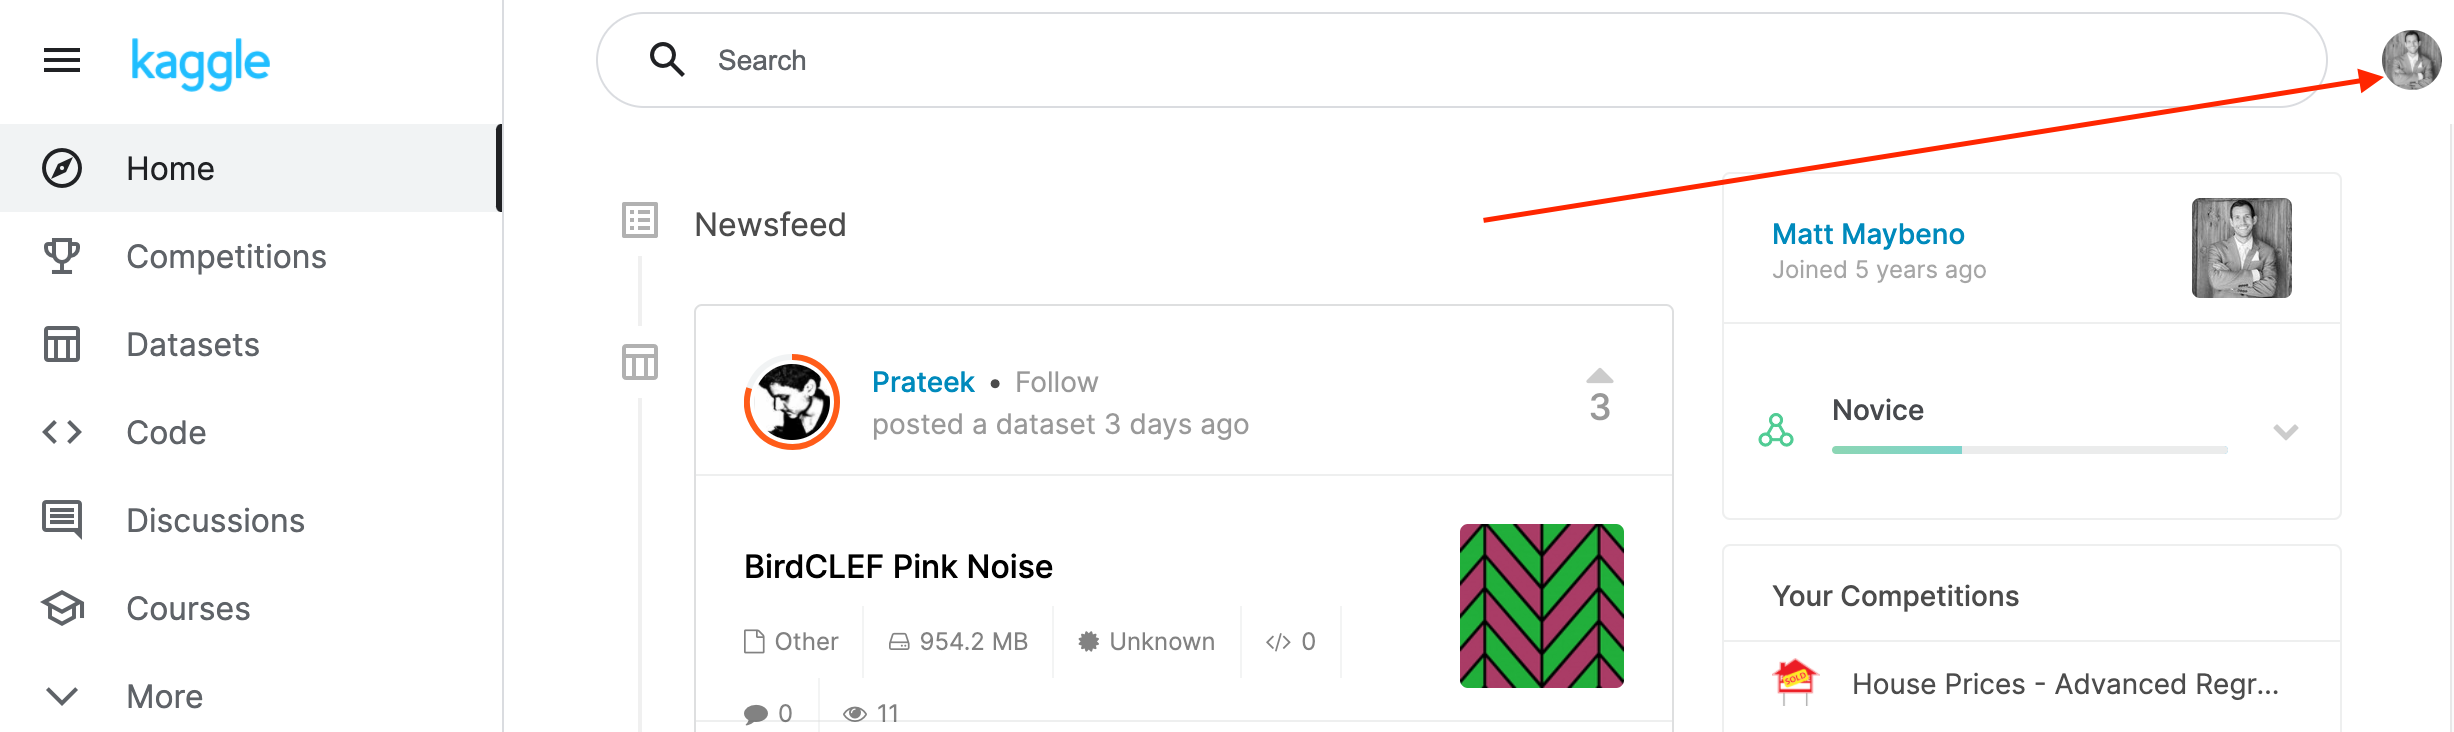
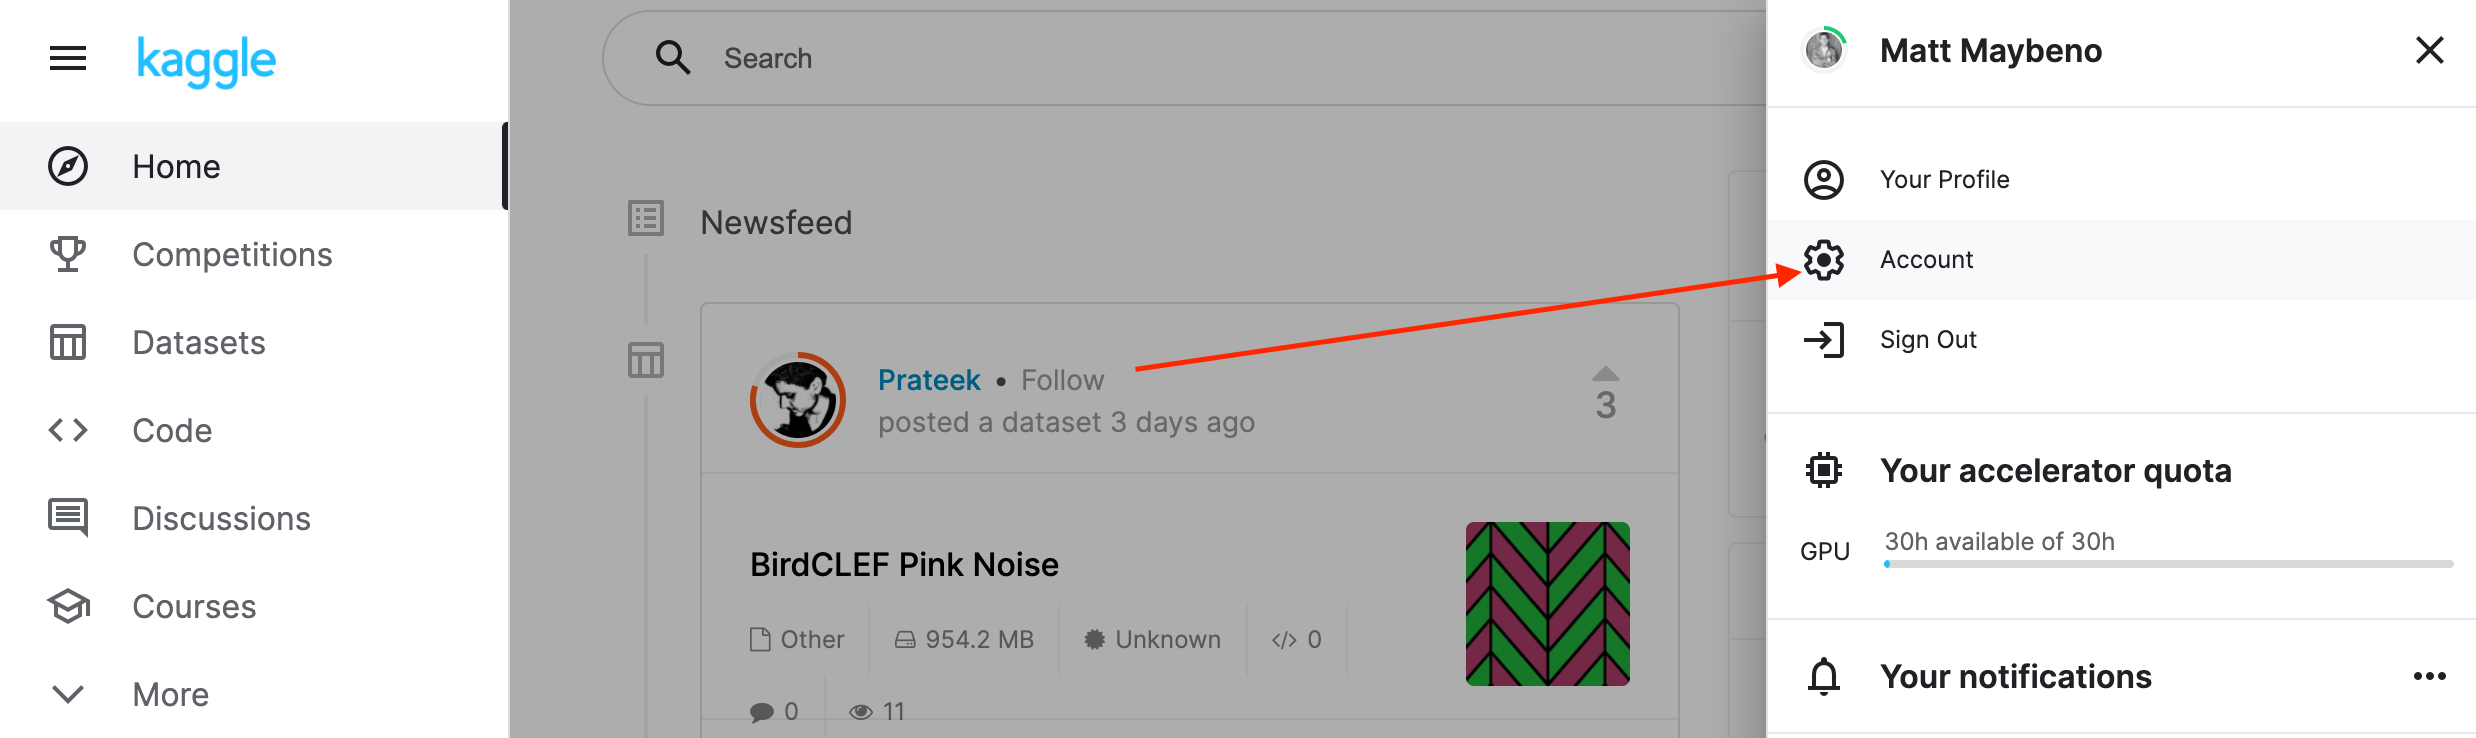
2. Scroll down to API and click Create New API Token.
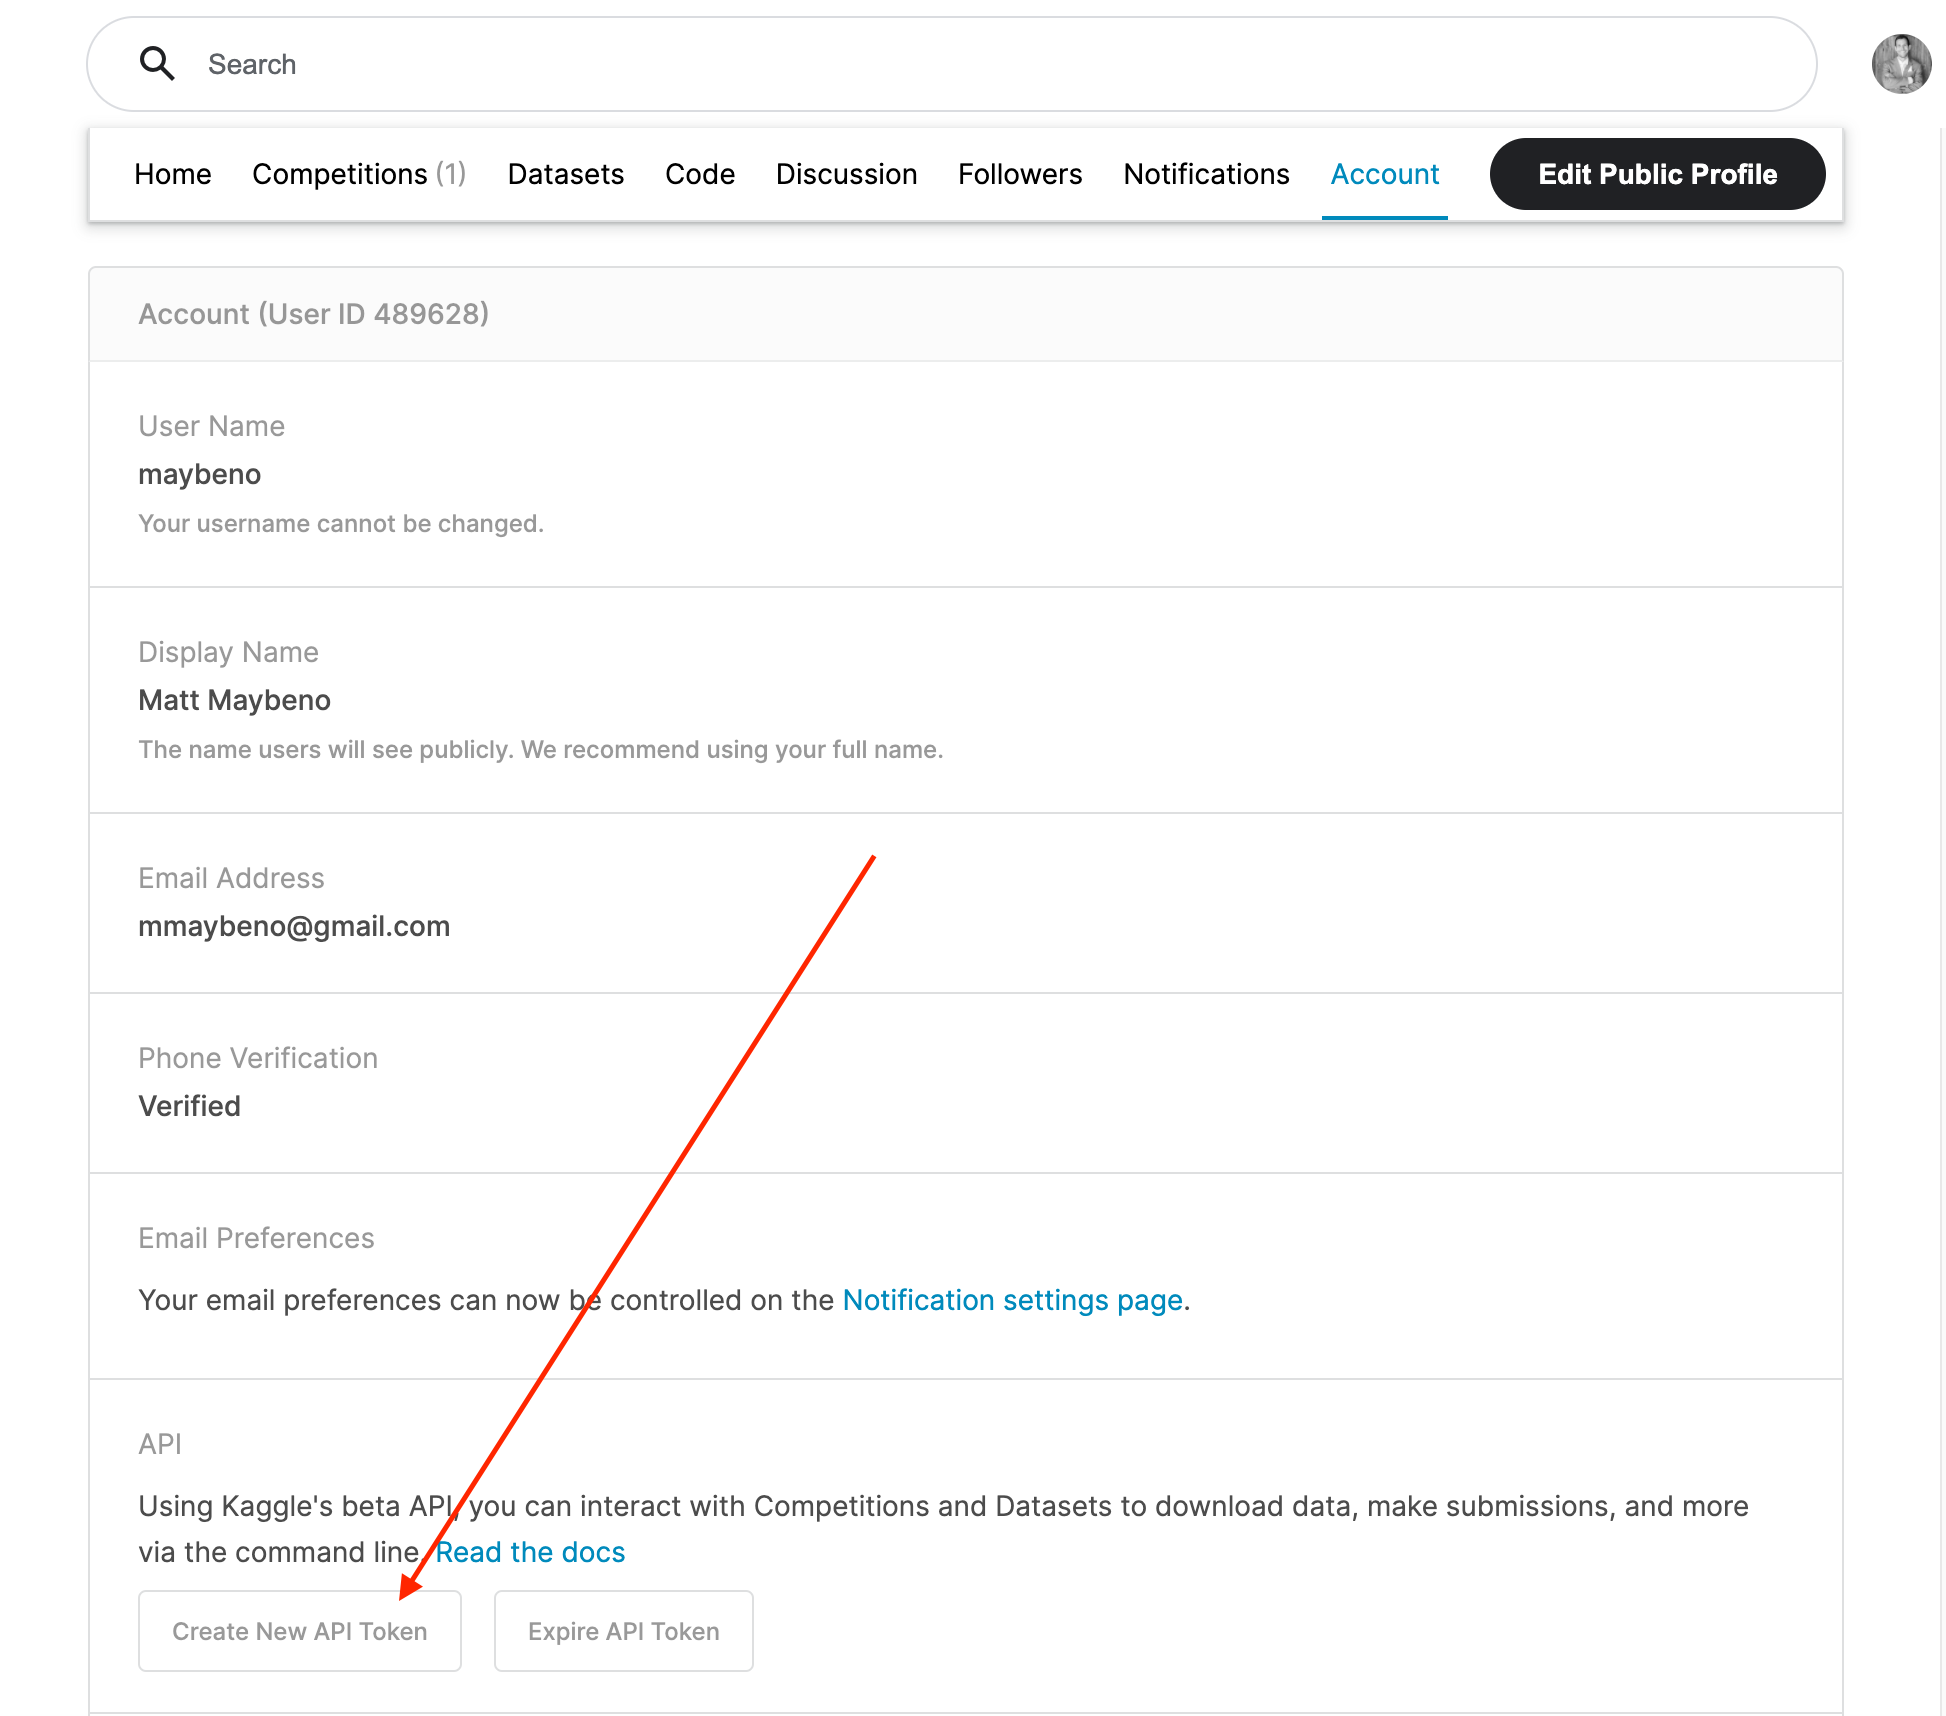
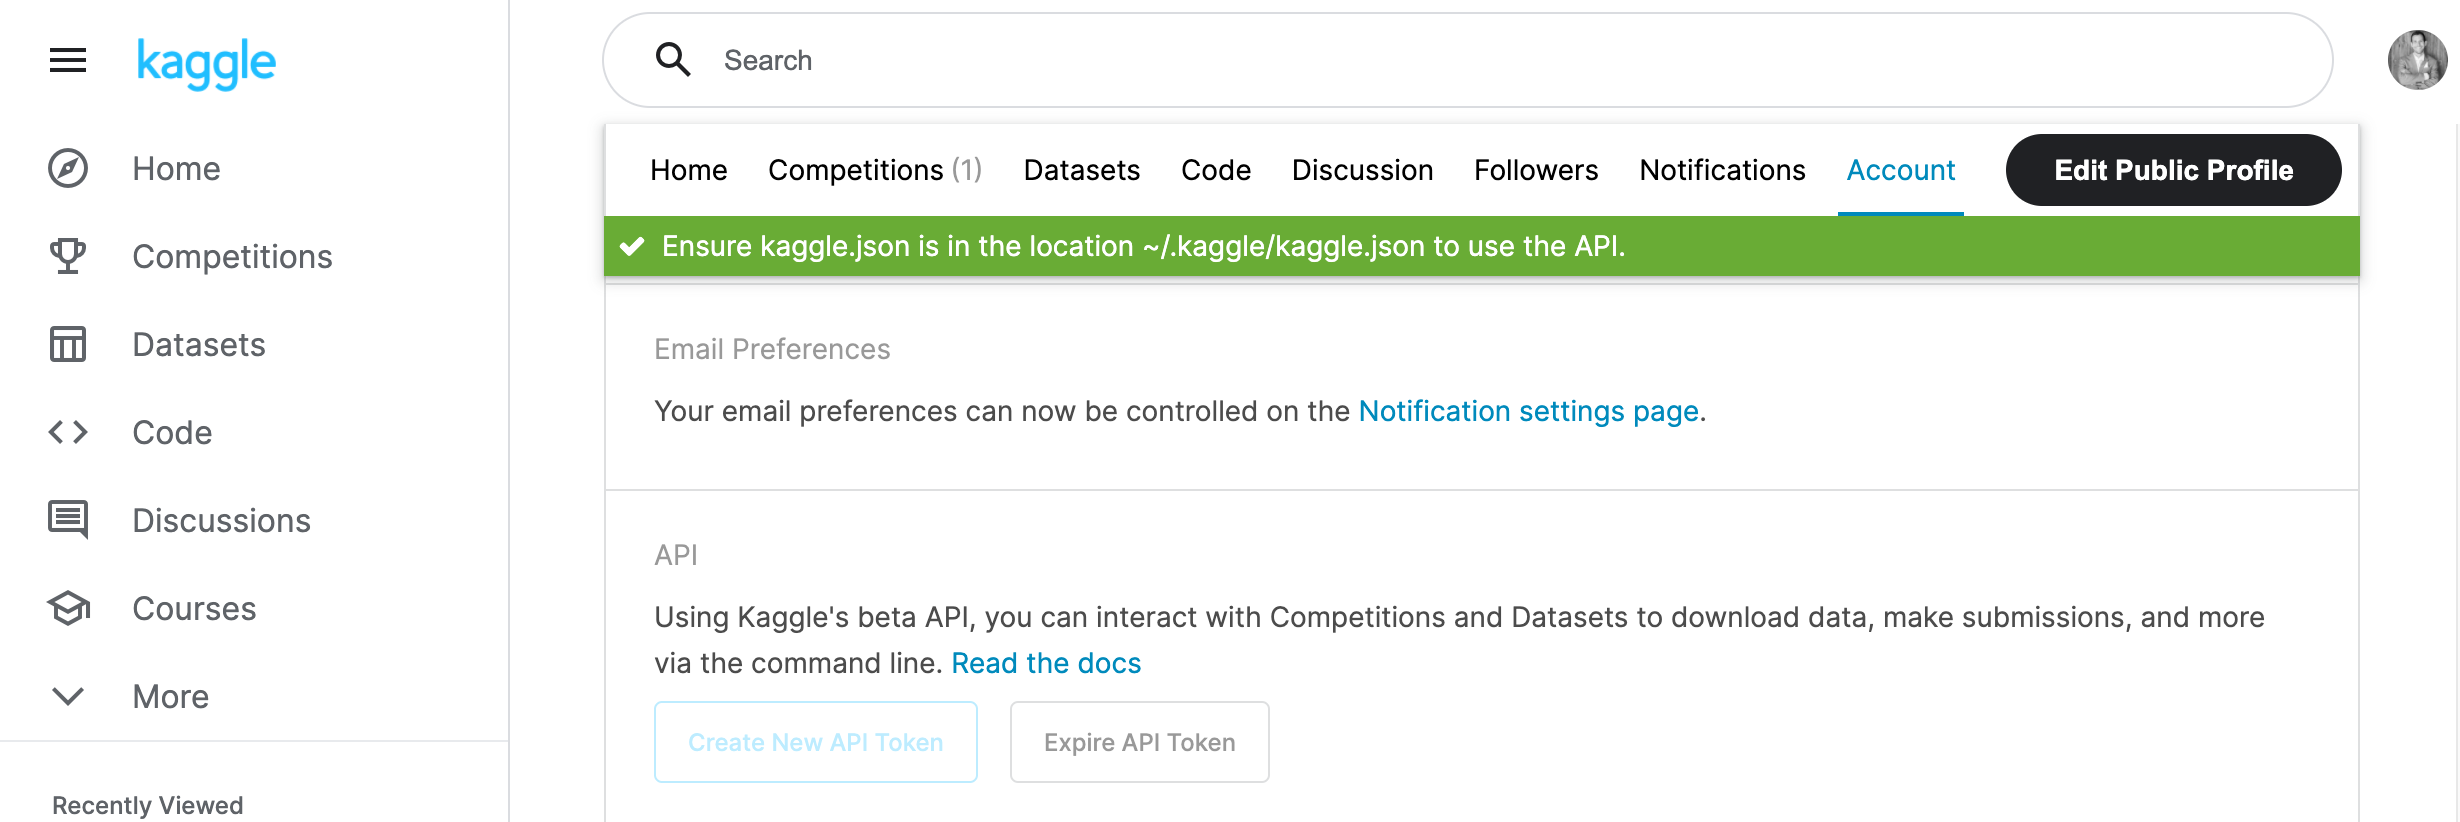
3. Open up `kaggle.json` and use the username and key.
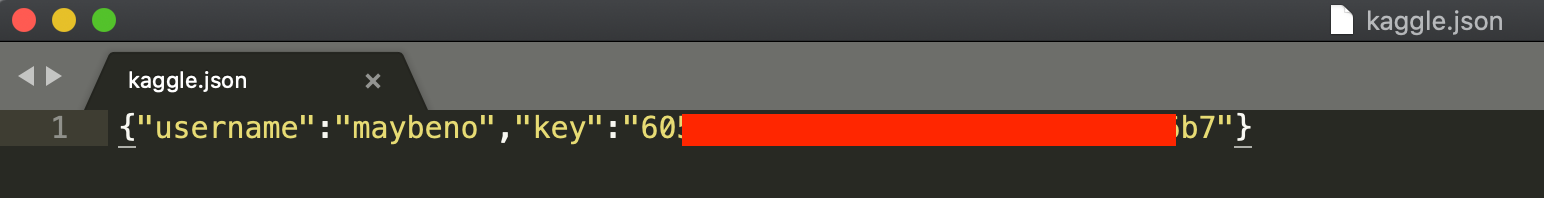

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

### Setup Kaggle API Key

In [ ]:
!pip install kaggle

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
# !mkdir -p /root/.kaggle
# !touch /root/.kaggle/kaggle.json
# !chmod 600 /root/.kaggle/kaggle.json

# !mkdir ~/.kaggle
# !mv cd0385-project-starter/project/kaggle.json ~/.kaggle/  # I moved the json file containing the downloaded API key from Kaggle to root directory
!chmod 600 ~/.kaggle/kaggle.json #Change the permissions of the file.

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
# import json
# kaggle_username = "your_user_name"
# kaggle_key = ""

# # Save API token the kaggle.json file
# with open("/root/.kaggle/kaggle.json", "w") as f:
#     f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
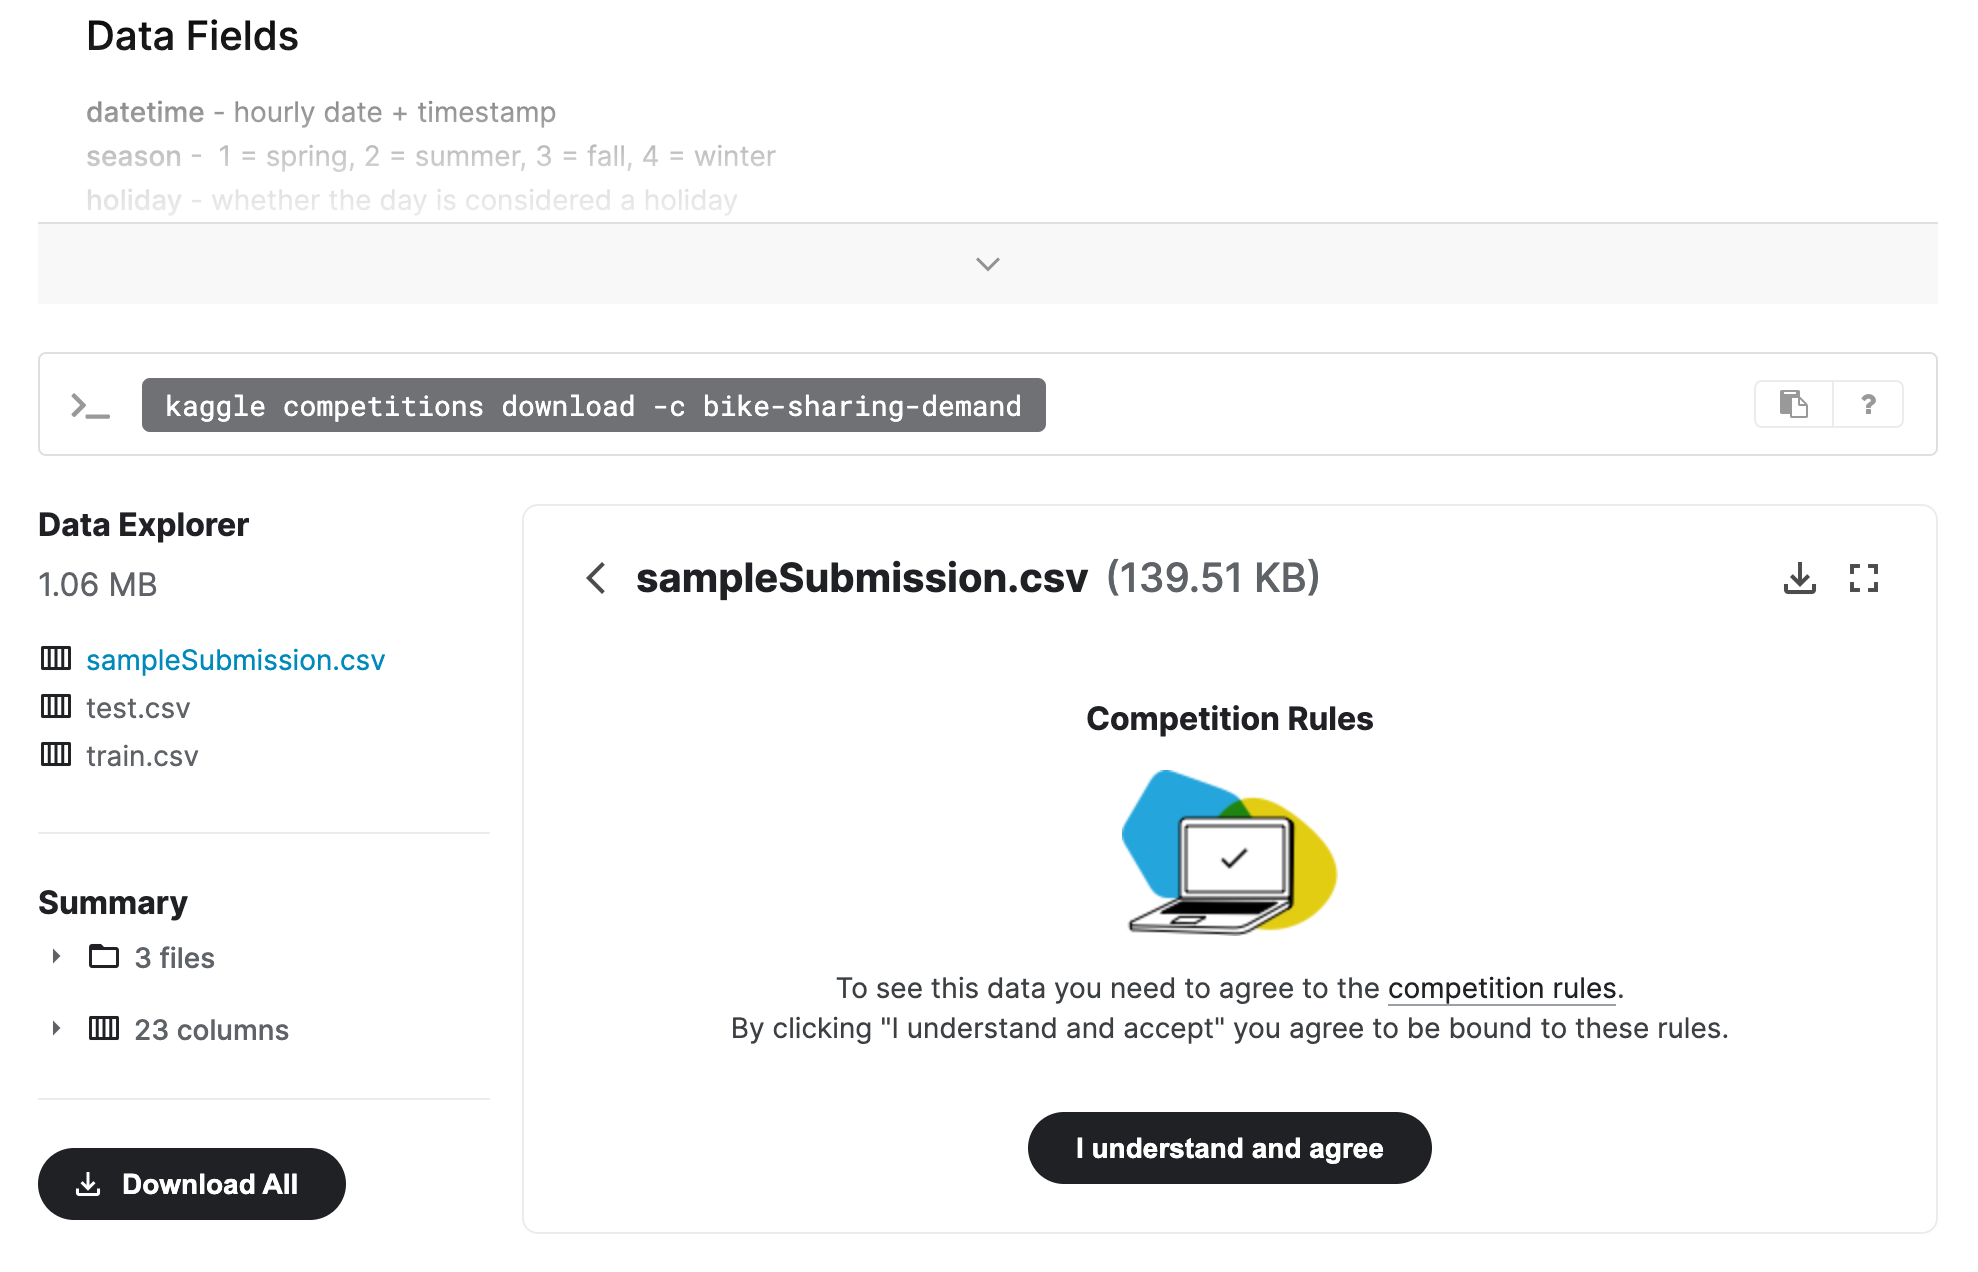

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor
import  autogluon.core as ag

In [67]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv", parse_dates = ["datetime"])
train.head()

#train = pd.read_csv("train.csv")
#train['datetime'] = pd.to_datetime(train['datetime'])

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [68]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [69]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv", parse_dates = ["datetime"])
test.head()

#test = pd.read_csv("test.csv")
# test['datetime'] =pd.to_datetime(test['datetime'])



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [70]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv", parse_dates = ["datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [71]:
predictor = TabularPredictor.load("AutogluonModels/ag-20230526_200648/")

In [ ]:
predictor = TabularPredictor(
    label = 'count', eval_metric = "root_mean_squared_error",learner_kwargs = {"ignored_columns": ["casual", "registered"]}
    ).fit(train_data = train, time_limit = 600, presets = "best_quality")


### Review AutoGluon's training run with ranking of models that did the best.

In [72]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.039754      18.815484  561.010952                0.000867           0.318658            3       True         14
1   RandomForestMSE_BAG_L2  -53.344657      14.133205  426.014191                0.655374          30.156769            2       True         12
2          LightGBM_BAG_L2  -55.025885      13.776204  422.627879                0.298373          26.770457            2       True         11
3          CatBoost_BAG_L2  -55.852274      13.527305  439.476855                0.049474          43.619433            2       True         13
4        LightGBMXT_BAG_L2  -60.153731      17.811398  460.145635                4.333566          64.288213            2       True         10
5    KNeighborsDist_BAG_L1  -84.125061       0.104084    0.040332         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54

### Create predictions from test dataset

In [73]:
predictions = predictor.predict(test)
predictions.head()

0    23.073221
1    42.436359
2    46.034626
3    49.568123
4    51.991051
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [74]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.627907
std        89.918228
min         2.982767
25%        19.985453
50%        63.896973
75%       167.417419
max       365.685089
Name: count, dtype: float64

In [75]:
def count_negative_predictions(predictions):
    """
    Prints the number of negative predictions
    """
    count = 0
    for pred in predictions:
        if pred < 0:
            count +=1
    print(f"There are {count} negative predictions")

In [76]:
# How many negative values do we have?
print(predictions.lt(0).value_counts(), "\n")

# Print the number of negative predictions
count_negative_predictions(predictions)

False    6493
Name: count, dtype: int64 

There are 0 negative predictions


In [77]:
# Set them to zero

#predictions = [0 if pred < 0 else pred for pred in predictions]
def set_negative_to_zero(data):
    for index, pred in enumerate(data):
        if pred < 0:
            data[index] = 0
            

In [78]:
# Set negative predictions to zero using the function defined above
set_negative_to_zero(predictions)

In [79]:
predictions.lt(0).value_counts()

False    6493
Name: count, dtype: int64

### Set predictions to submission dataframe, save, and submit

In [80]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [82]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,23.073221
1,2011-01-20 01:00:00,42.436359
2,2011-01-20 02:00:00,46.034626
3,2011-01-20 03:00:00,49.568123
4,2011-01-20 04:00:00,51.991051


In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### Initial score of `1.8001`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

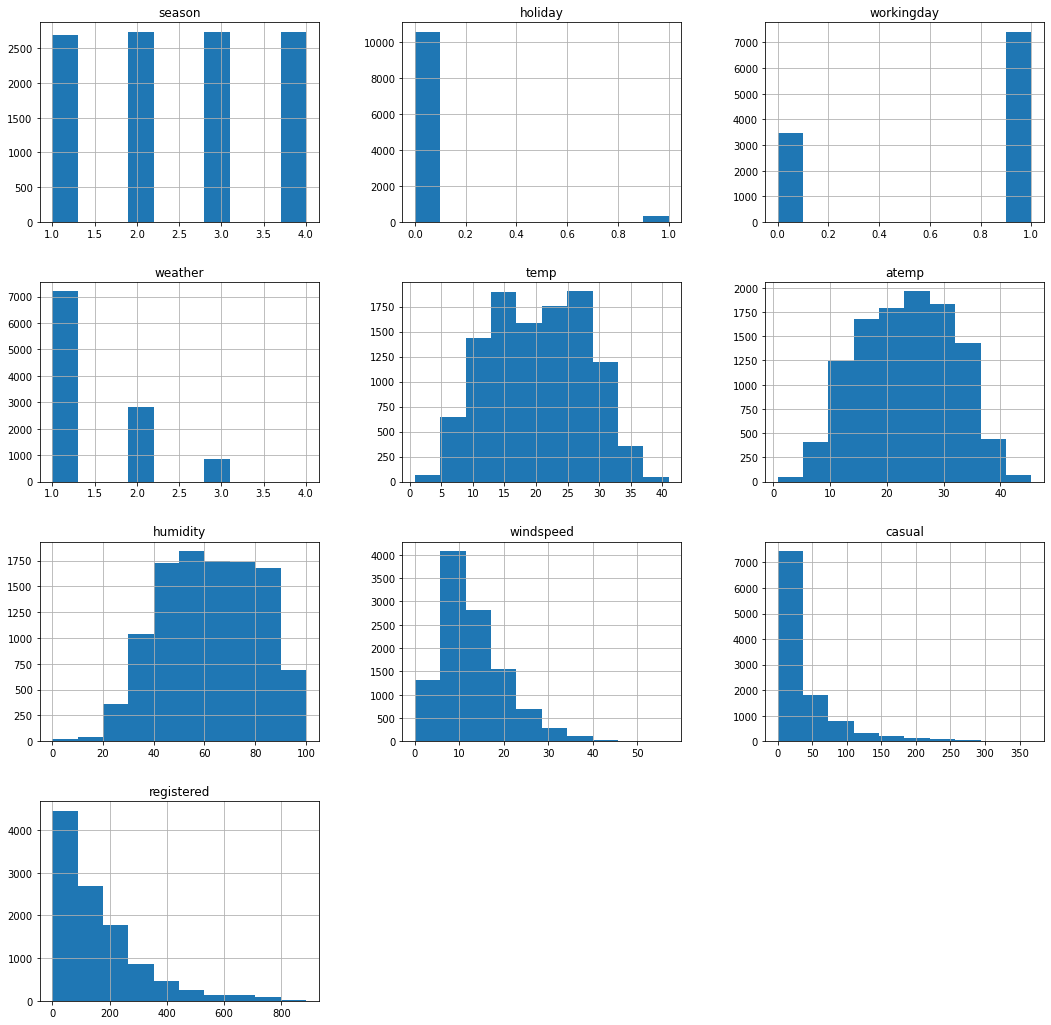

In [84]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
plt.rcParams["figure.figsize"] = (18,18)
train.iloc[:,1:-1].hist()

In [93]:
def data_transform(df):
    """ 
    This function transforms the 'datetime' column of a DataFrame into four separate components: year, month, day, and hour.
    It returns a new DataFrame with the transformed columns.
    """
    df_copy = df.copy()  # Create a copy of the original DataFrame to avoid modifying it
    
    df_copy['year'] = df_copy['datetime'].dt.year
    df_copy['month'] = df_copy['datetime'].dt.month
    df_copy['day'] = df_copy['datetime'].dt.day
    df_copy['hour'] = df_copy['datetime'].dt.hour
    df_copy['day_of_week'] = df_copy['datetime'].dt.strftime('%A')
    
    
    df_copy.drop('datetime', axis=1, inplace=True)  # Drop the original 'datetime' column
    
    return df_copy


In [94]:
# Transform the dataset
train_transformed = data_transform(train)
test_transformed = data_transform(test)

### Creating a new feature from the `temp` feature

In [95]:
def categorize_temperature(df):
    df['temp_category'] = ''
    for idx, temp in enumerate(df['temp']):
        if temp >= 25:  # Hot temperature range
            df.loc[idx, 'temp_category'] = "Hot"
        elif temp <= 10:  # Cold temperature range
            df.loc[idx, 'temp_category'] = "Cold"
        else:  # Mild temperature range
            df.loc[idx, 'temp_category'] = "Mild"



In [96]:
#Apply the categorize_temperature function to create a new column 'temp_category'
categorize_temperature(train_transformed)
categorize_temperature(test_transformed)


In [ ]:
#train_transformed.info()

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [97]:
def convert_columns_to_(data, columns, dtype):
    """
    Convert specified columns in a DataFrame to the specified data type.

    Parameters:
    data (DataFrame): The input DataFrame.
    columns (list): List of column names to be converted.
    dtype (type): The data type to convert the columns to.
    """
    for col in columns:
        data[col] = data[col].astype(dtype)
    return data


In [98]:
# Convert some feature to categorical
cols_to_convert = ["season","weather","holiday","workingday", "month", "year","hour","day", "day_of_week", "temp_category"] 

train_transformed = convert_columns_to_(train_transformed, cols_to_convert, "category")
test_transformed = convert_columns_to_(test_transformed, cols_to_convert, "category")

In [ ]:
#train_transformed.info()

## Making Labels for Nominal and Ordinal Features More Descriptive for Exploration

In [99]:
def label_mapping(mapping, data):
    return data.replace(mapping)

In [100]:
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall",4: "Winter"}

month_mapping = {1: "January", 2: "February", 3: "March", 4: "April",
                 5: "May", 6: "June", 7: "July", 8: "August",
                 9: "September", 10: "October", 11: "November", 12: "December"}

# Create a copy of the transformed_train dataset and assign it to eda_train
eda_train = train_transformed.copy()


# Apply label mapping to the 'season' and 'month' features in eda_train 
eda_train["season"] = label_mapping(season_mapping, eda_train["season"])
eda_train["month"] = label_mapping(month_mapping, eda_train["month"])



In [101]:
# View 
eda_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,day_of_week,temp_category
0,Spring,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,January,1,0,Saturday,Cold
1,Spring,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,January,1,1,Saturday,Cold
2,Spring,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,January,1,2,Saturday,Cold
3,Spring,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,January,1,3,Saturday,Cold
4,Spring,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,January,1,4,Saturday,Cold


In [102]:
# Function to get the numeric and non-numeric features in a dataframe

def get_num_and_non_numeric_features(df):
    """
    Get the numeric and non-numeric (categorical) features in a DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame.

    Returns:
    tuple: A tuple containing two lists - numeric features and categorical features.
    """

    numeric_features = df.select_dtypes(include=["number"]).columns
    categorical_features = df.select_dtypes(exclude=["number"]).columns

    return numeric_features, categorical_features


In [103]:
# get the columns with numeric and non-numeric features in the train data for the purpose of EDA

numeric_features, categorical_features = get_num_and_non_numeric_features(eda_train)

## Visualizing Numeric Feature Distribution with Histograms, Kernel Density Plots, and Normality Plots

In [104]:
# View histogram of all features again now with the hour feature 
def plot_numeric_feature_distribution(df):
    numeric_features, _ = get_num_and_non_numeric_features(df)
    
    # Plot histograms for numeric columns
    for col_name in numeric_features:
        
        plt.figure(figsize=(20,7))
        plt.subplot(1, 3, 1)
        plt.hist(df[col_name])
        #sns.histplot(data=df, x=col_name, kde=True, bins='auto', edgecolor='k')
        plt.xlabel(col_name)
        plt.ylabel('Frequency')
        plt.title(f'Histogram for {col_name}')
        
        
        # Create kernel density plot
        plt.subplot(1, 3, 2)  # Subplot 2: Kernel Density
        sns.kdeplot(df[col_name])

        # Set labels and title
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.title(f'Kernel Density Plot {col_name}')
        
        # Create normality plot
        plt.subplot(1, 3, 3)  # Subplot 3: Normality plot
        stats.probplot(df[col_name], plot=plt)
        plt.title(f'Normality Plot for {col_name}')
        
        plt.show()
        

        

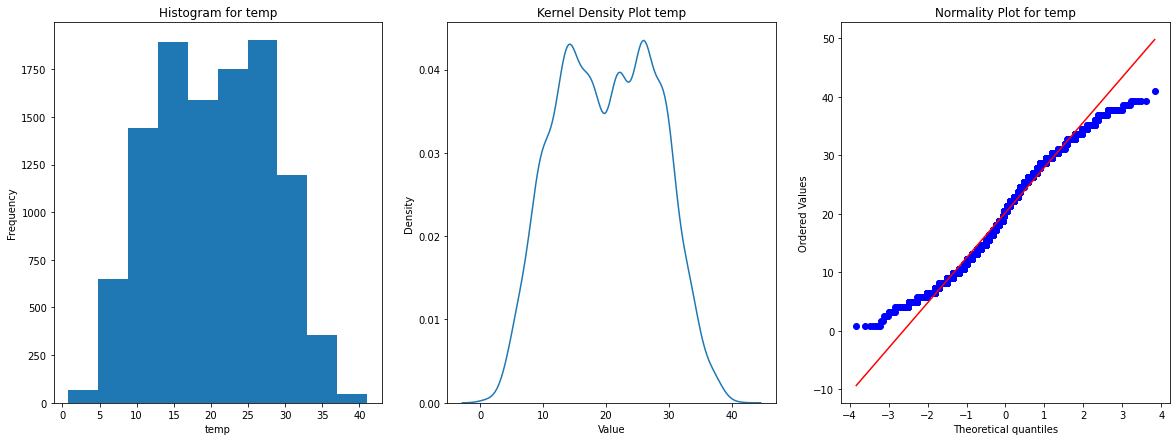

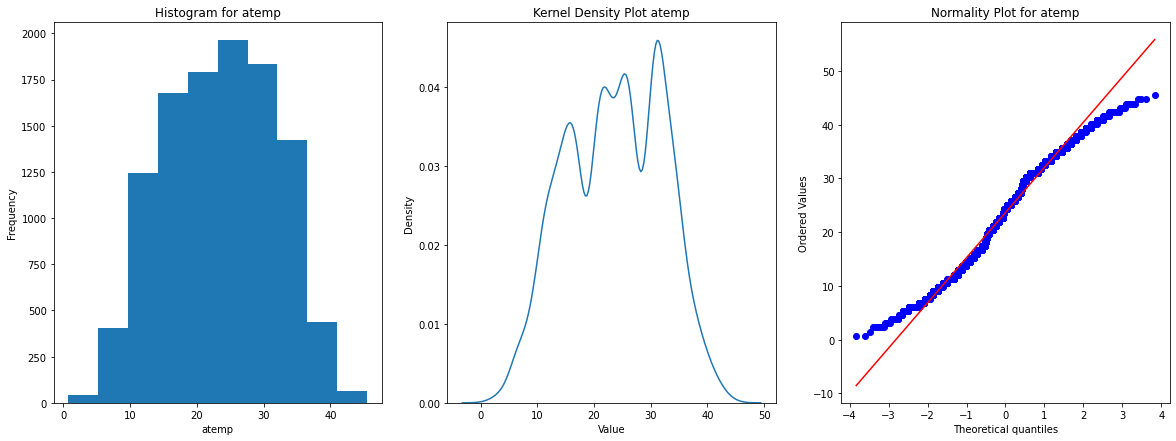

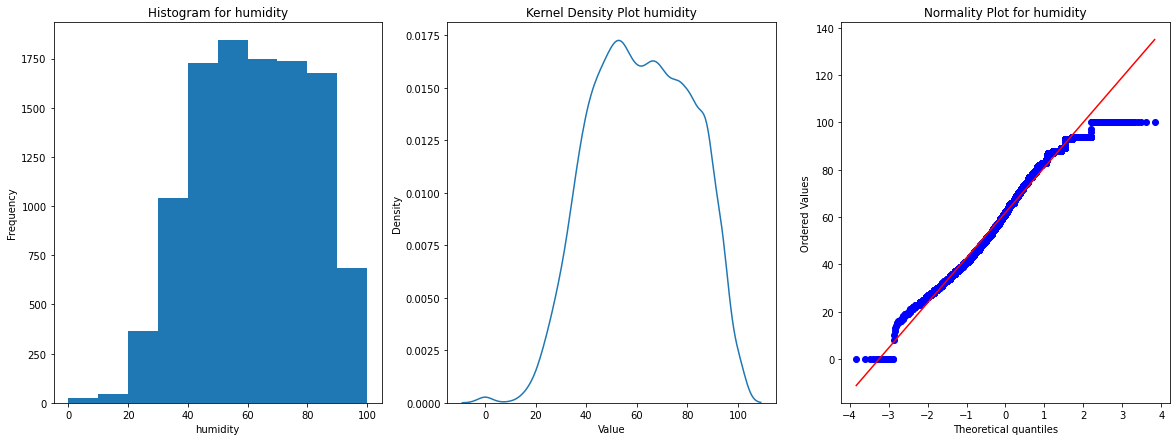

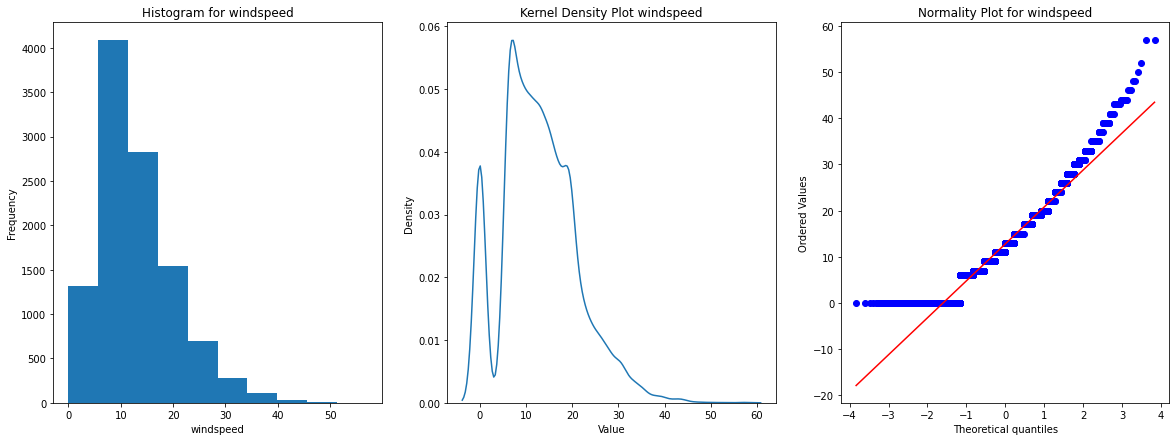

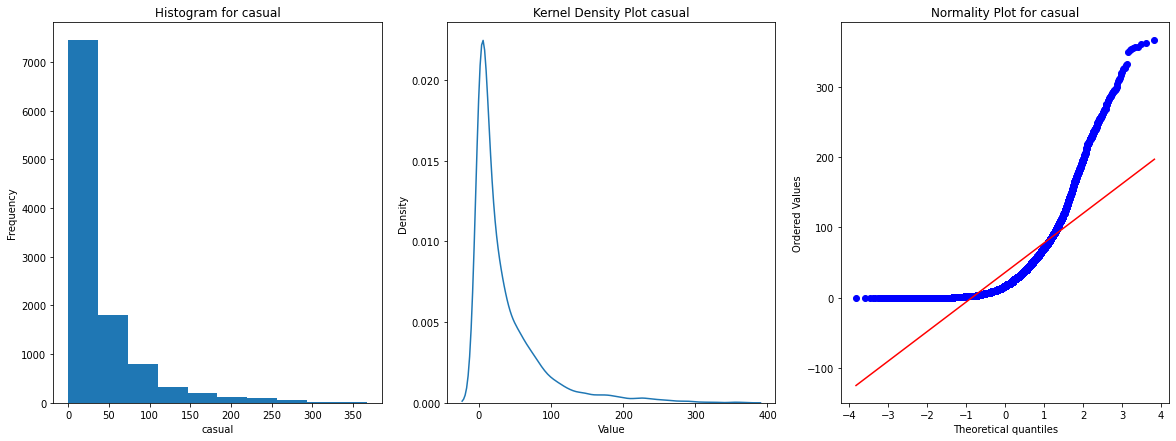

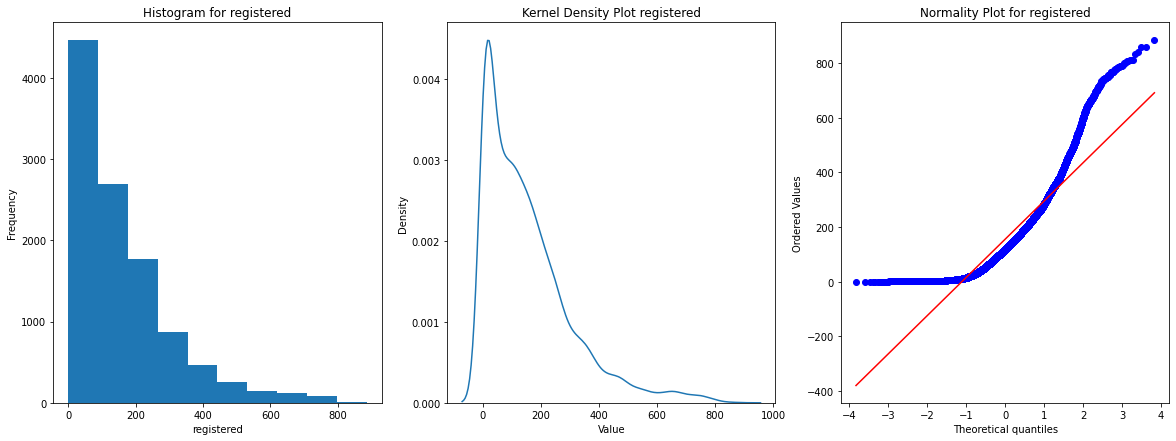

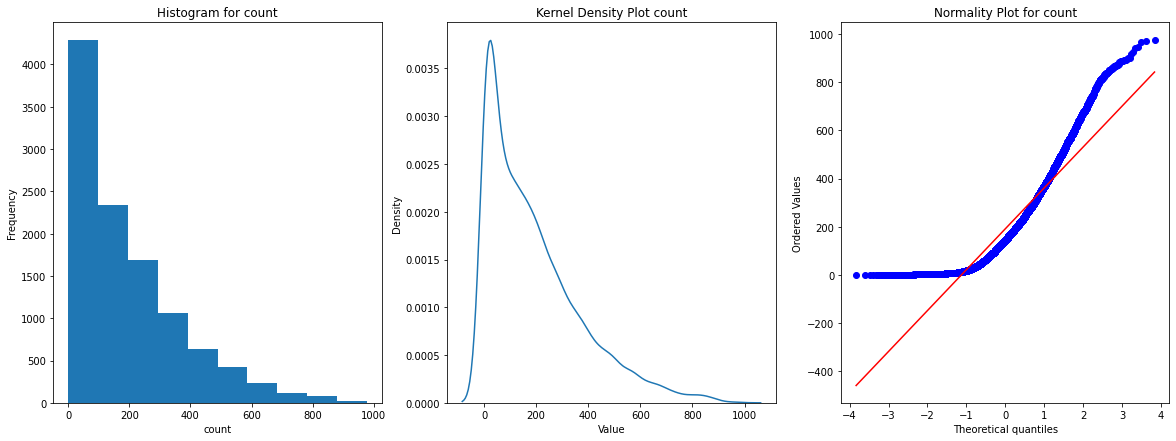

In [105]:
## Plot feature distribution
plot_numeric_feature_distribution(eda_train)

## Visualizing Categorical Feature Distribution with Bar Plots

In [106]:
def plot_categorical_feature_distribution(df):
    
    _ , categorical_features = get_num_and_non_numeric_features(df)
    # Plot bar charts for categorical columns
    for col_name in categorical_features:
        y = df[col_name].value_counts() 
        x = df[col_name].value_counts().index
        
        plt.figure(figsize=(9,7))
        plt.bar(x, y)
        plt.xlabel(col_name)
        plt.ylabel('Frequency')
        plt.title(f'Bar plot for {col_name}')
        plt.xticks(x)
        
        plt.show()

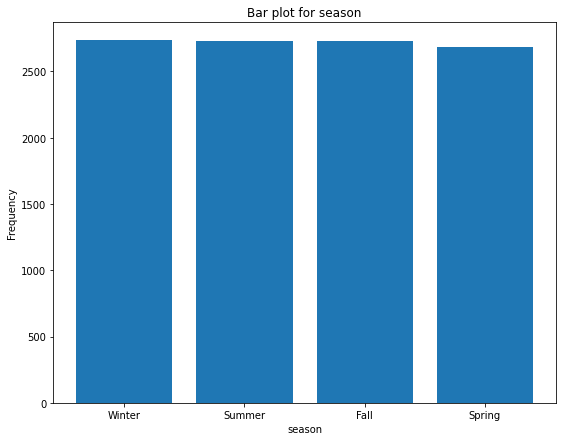

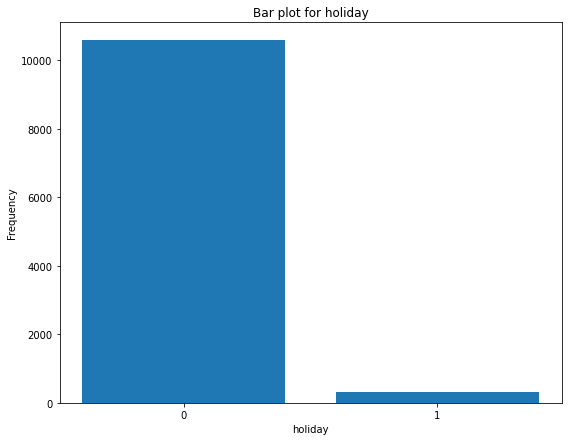

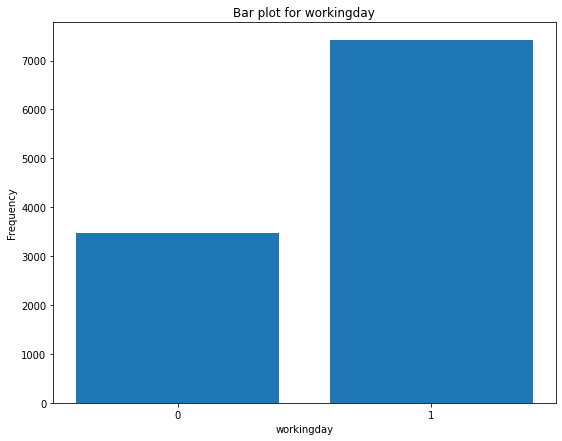

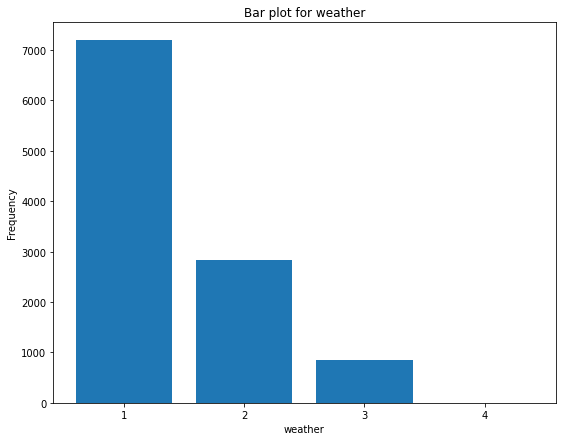

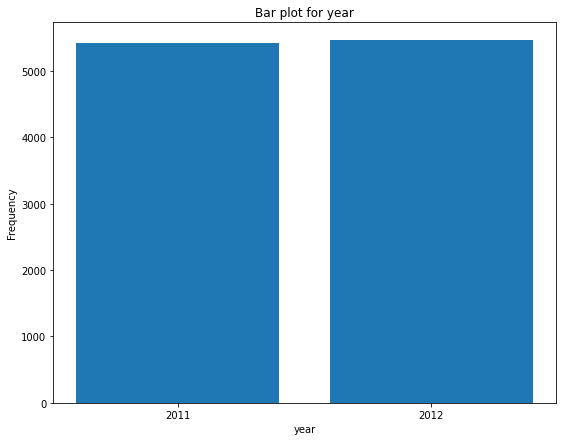

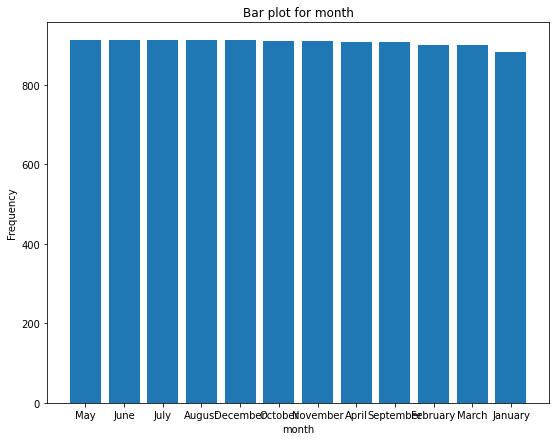

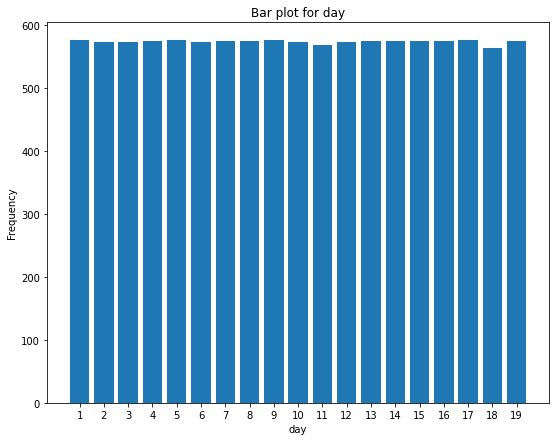

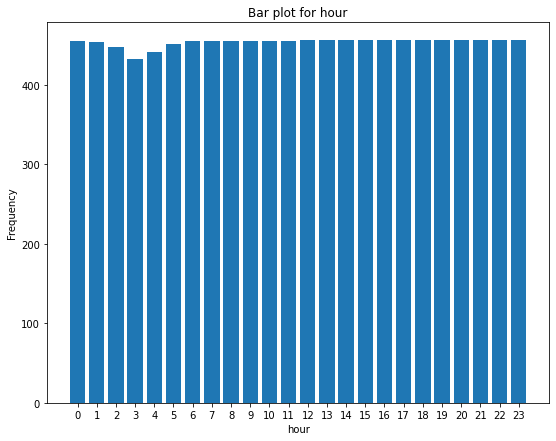

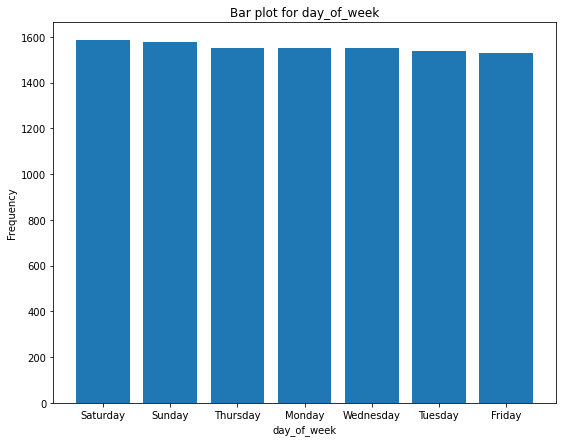

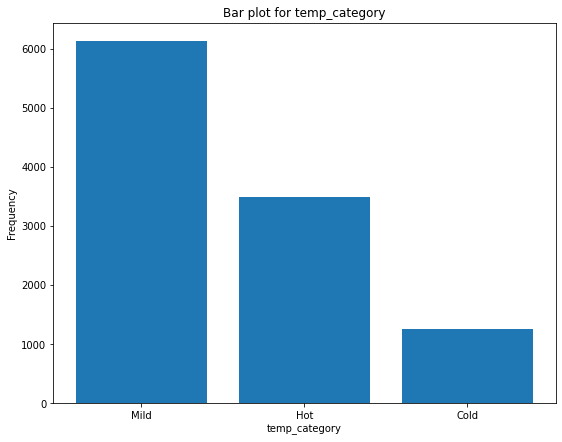

In [107]:
## Plot feature distribution
plot_categorical_feature_distribution(eda_train)

### Bike rentals Trend by Feature and Year'

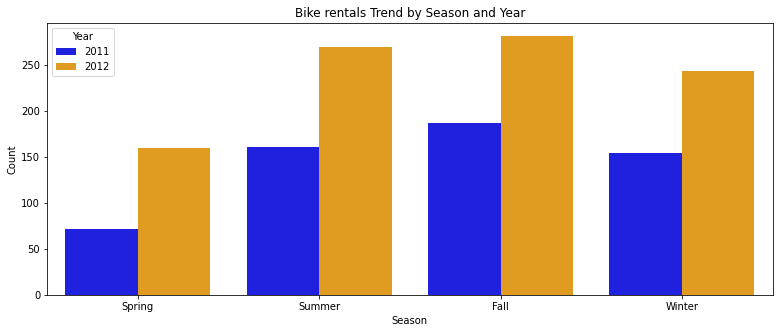

<Figure size 1296x1296 with 0 Axes>

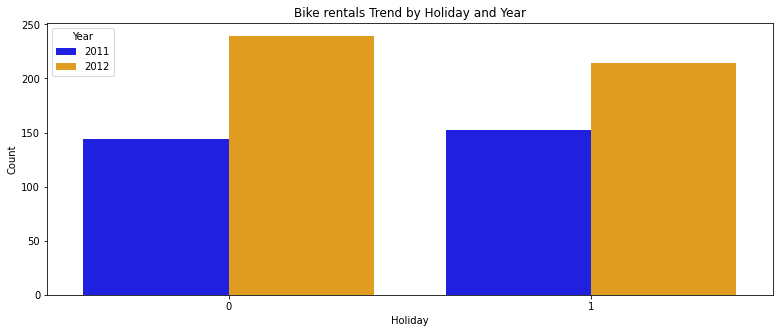

<Figure size 1296x1296 with 0 Axes>

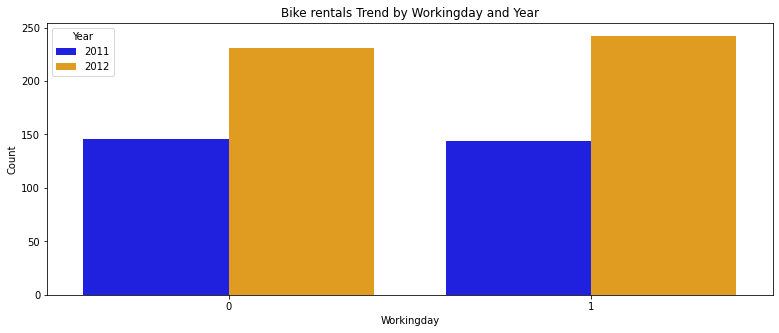

<Figure size 1296x1296 with 0 Axes>

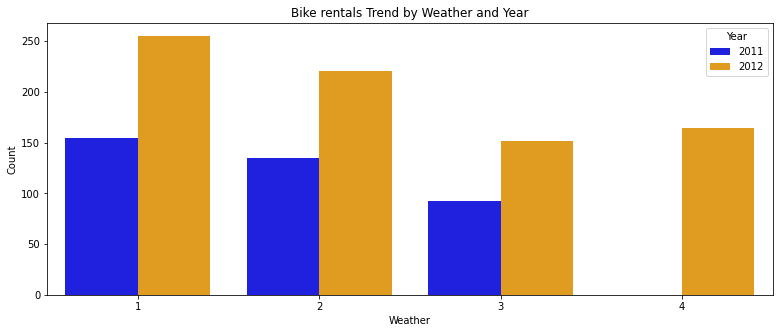

<Figure size 1296x1296 with 0 Axes>

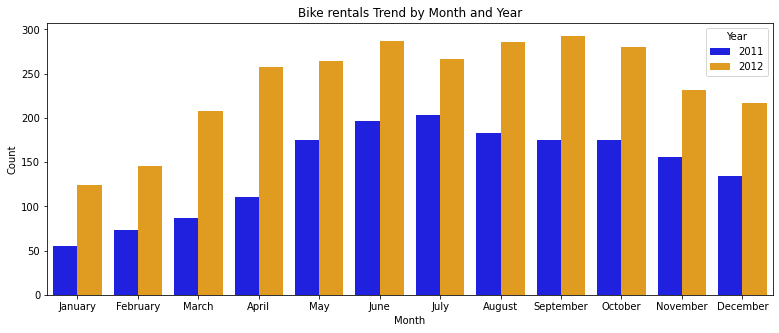

<Figure size 1296x1296 with 0 Axes>

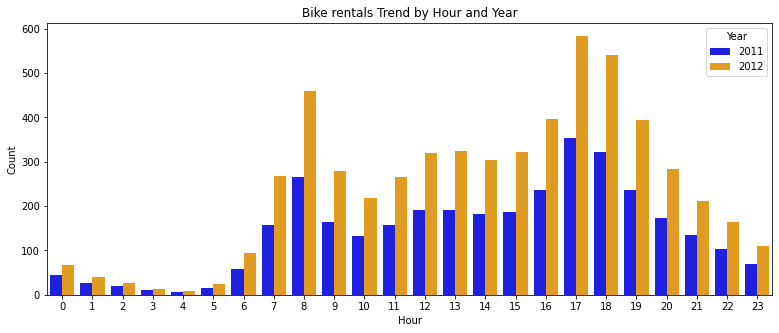

<Figure size 1296x1296 with 0 Axes>

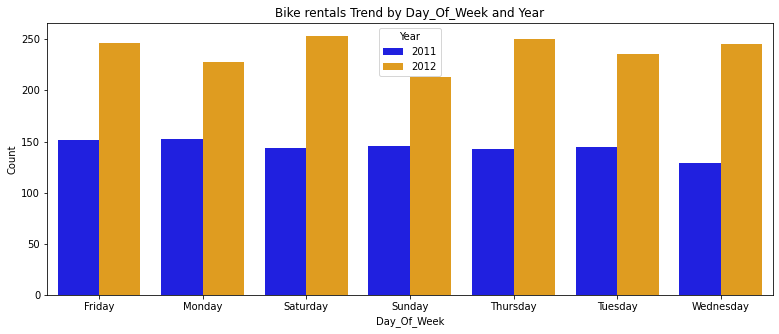

<Figure size 1296x1296 with 0 Axes>

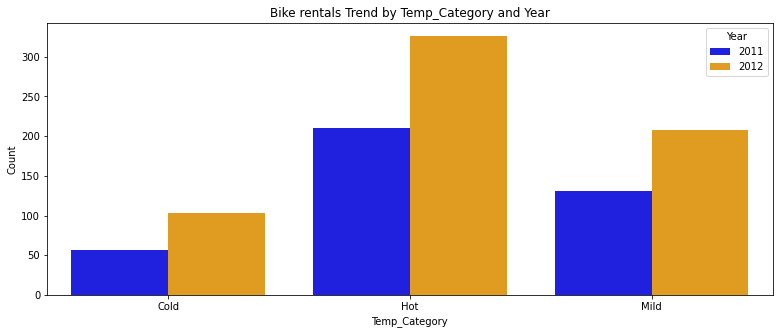

<Figure size 1296x1296 with 0 Axes>

In [108]:
# Trend of bike rental in both years (2011 and 2012)

features_of_interest = categorical_features.tolist()
features_of_interest.remove("year")   # Remove "year" from the list of features
features_of_interest.remove("day")   # Remove "day" from the list of features

for feature in features_of_interest:
    
    plt.figure(figsize=(13, 5))
    sns.barplot(data=eda_train, x=feature, y='count', hue='year', palette=['blue', 'orange'], ci = None)
    plt.title(f'Bike rentals Trend by {feature.title()} and Year')
    plt.xlabel(feature.title())
    plt.ylabel('Count')
    plt.legend(title='Year')
    plt.show()
    plt.clf()




## Heat Map for the Numeric Variables

We will focus on the numeric variables as categorical variables require addittional preprocessing to be used in a heatmap

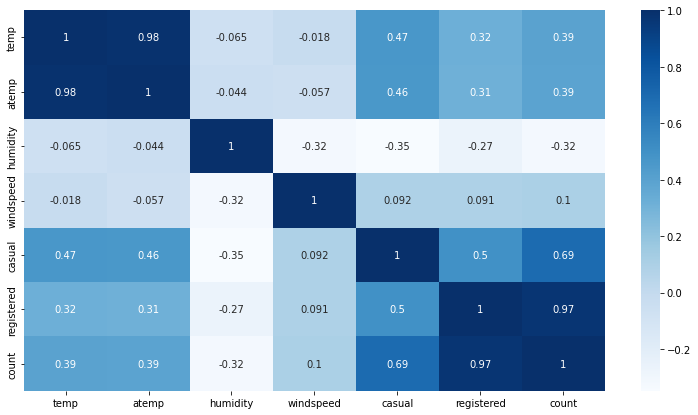

In [109]:
numeric_train = train_transformed.select_dtypes(include=["number"])

#calculate correlation matrix
corr_matrix = numeric_train.corr()

# Create the heatmap with 'Set1' colormap
plt.figure(figsize=(13, 7))
sns.heatmap(data = corr_matrix, annot = True, cmap ='Blues')  #viridis

plt.show()

> 

- `temp` and `atemp` have strong positive correlation of approximately 0.98, indicating a high degree of association between the two features. This suggest that they provide similar information, Hence, we may consider droping one. We will be dropping `atemp`. `count` has a highly positive correlation of approximately 0.97 and 0.68 with `registered` and `casual` respectively. This is expected as the sum of these two features equals the `count` variable.

- `temp` and `count` have a moderate positive correlation of approximately 0.39, suggesting that higher temperatures tend to be associated with higher bike rental `counts`. 

- We will also be dropping `casual` and `registered` as they are not included in the test dataset.

In [110]:
train_transformed.drop(["atemp", "casual","registered"], axis = 1, inplace = True)
test_transformed.drop(["atemp"], axis =1, inplace = True)

In [ ]:
#train_transformed.info()

In [ ]:
#test_transformed.info()

## Step 5: Rerun the model with the same settings as before, just with more features

In [111]:
#predictor_new_features = TabularPredictor.load("AutogluonModels/ag-20230601_061414/")

In [ ]:
predictor_new_features = TabularPredictor(
    label = 'count', eval_metric = "root_mean_squared_error"
    ).fit(train_data = train_transformed, time_limit = 600, presets = "best_quality")

In [112]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -33.707630      19.274700  538.683307                0.001291           0.409648            3       True         15
1     ExtraTreesMSE_BAG_L2  -33.849025      18.475112  409.160418                0.616287           8.582477            2       True         14
2      WeightedEnsemble_L2  -33.951440      17.134274  356.279122                0.001158           0.517337            2       True          9
3          CatBoost_BAG_L2  -34.214409      18.054220  480.978356                0.195395          80.400416            2       True         13
4          LightGBM_BAG_L2  -34.442006      18.036205  424.016097                0.177380          23.438157            2       True         11
5   RandomForestMSE_BAG_L2  -34.767376      18.487382  428.409276         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -165.14207054922935,
  'KNeighborsDist_BAG_L1': -179.4216148241622,
  'LightGBMXT_BAG_L1': -34.893309736873874,
  'LightGBM_BAG_L1': -

## Create Predictions from the Test Dataset

In [113]:
predictions_new = predictor_new_features.predict(test_transformed)
predictions_new.head()

0    9.043253
1    4.098663
2    3.932493
3    3.281314
4    3.103755
Name: count, dtype: float32

In [114]:
predictions_new.describe()

count    6493.000000
mean      191.475266
std       175.935684
min         2.131397
25%        46.554123
50%       146.639679
75%       285.966370
max       911.008484
Name: count, dtype: float64

In [115]:
# How many negative values do we have?
print(predictions_new.lt(0).value_counts(), "\n")

# Print the number of negative predictions
count_negative_predictions(predictions_new)

False    6493
Name: count, dtype: int64 

There are 0 negative predictions


In [116]:
# set negative predictions to zero
set_negative_to_zero(predictions_new)

### Create new submission dataframe

In [117]:
submission_new_features = pd.read_csv("sampleSubmission.csv", parse_dates = ["datetime"])

In [118]:
# Same submitting predictions
submission_new_features["count"] = predictions_new
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [119]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 404kB/s]
Successfully submitted to Bike Sharing Demand

In [120]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                      date                 description                        status    publicScore  privateScore  
----------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv   2023-06-01 08:45:33  new features                       complete  0.43413      0.43413       
submission_new_hpo5.csv       2023-06-01 08:26:56  new features with hyperparameters  complete  0.44427      0.44427       
submission_new_hpo5.csv       2023-06-01 08:09:54  new features with hyperparameters  complete  0.47632      0.47632       
submission_new_hpo.csv        2023-06-01 07:15:42  new features with hyperparameters  complete  0.43957      0.43957       
tail: write error: Broken pipe


#### New Score of `0.43413`

In [ ]:
# # Retrieve feature importance
# feature_importance = predictor_new_features.feature_importance(train_transformed, subsample_size = 5000, time_limit = 100)

# # Display feature importance scores
# print(feature_importance)

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [121]:
#predictor_new_hpo =TabularPredictor.load("AutogluonModels/ag-20230601_070111/")

In [122]:
hyperparameters = {
    'NN_TORCH': {
        'num_epochs': 10,
        'learning_rate': ag.space.Real(1e-4, 1e-1, default=5e-4, log=True),
        'dropout_prob': ag.space.Real(0.0, 0.5, default=0.3),
    },
    'GBM': [
        {
            'num_boost_round': 100,
            'num_leaves': ag.space.Int(lower=26, upper=66, default=36),
        },
    ],
    'CAT': {
        'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),
        'l2_leaf_reg': ag.space.Real(1.0, 5.0, default=3),
        'depth': ag.space.Int(lower=4, upper=10),
        'subsample': ag.space.Real(0.5, 1.0, default=1.0),
    },
    'XGB': {
        'eta': ag.space.Real(0.01, 0.3, default=0.1, log=True),
        'max_depth': ag.space.Int(lower=3, upper=10, default=3),
        'subsample': ag.space.Real(0.5, 1.0, default=1.0),
    },
    'FASTAI': {
        'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),
        'pretrained': ag.space.Categorical(True, False),
    },
    'RF': {},
    'XT': {},
    'KNN':{},
}


hyperparameter_tune_kwargs = {
    "searcher": "bayes", # random
    "scheduler": "local",
}

In [ ]:
# predictor_new_hpo = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(
#     train_data=train_transformed,auto_stack = True, time_limit = 900,
#     presets='best_quality',hyperparameters=hyperparameters, hyperparameter_tune_kwargs='auto')

In [ ]:
predictor_new_hpo = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(
    train_data=train_transformed,auto_stack = True, time_limit = 900,
    presets='best_quality',hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

In [123]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L3  -35.748625       0.002814  328.582964                0.000868           0.391276            3       True         16
1     ExtraTrees_BAG_L2  -36.073193       0.001330  236.028942                0.000198          11.918624            2       True         14
2    LightGBM_BAG_L2/T2  -36.138401       0.001262  247.615039                0.000130          23.504720            2       True         11
3    LightGBM_BAG_L2/T1  -36.405498       0.001263  247.326395                0.000130          23.216076            2       True         10
4   RandomForest_BAG_L2  -36.536610       0.001476  254.080641                0.000344          29.970323            2       True         12
5     XGBoost_BAG_L2/T1  -36.546685       0.001274  262.798021                0.000142      

{'model_types': {'KNeighbors_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1/T1': 'StackerEnsembleModel_CatBoost',
  'ExtraTrees_BAG_L1': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2/T1': 'StackerEnsembleModel_CatBoost',
  'ExtraTrees_BAG_L2': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L2/T1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighbors_BAG_L1': -165.14207054922935,
  'LightGBM_BAG_L1/T1': -42.89061011145025,
  'LightGBM_BAG_L1/T2': -40.94936075

In [124]:
# predictions_new_hpo = predictor_new_hpo.predict(test_transformed)
predictions_new_hpo = predictor_new_hpo.predict(test_transformed)
predictions_new_hpo.head()

0    8.938316
1    5.129036
2    4.789565
3    4.104260
4    3.944173
Name: count, dtype: float32

In [125]:
# How many negative values do we have?
print(predictions_new_hpo.lt(0).value_counts(), "\n")

# Print the number of negative predictions
count_negative_predictions(predictions_new_hpo)

False    6493
Name: count, dtype: int64 

There are 0 negative predictions


In [126]:
# set negative predictions to zero using the function `set_negative_to_zero`
set_negative_to_zero(predictions_new_hpo)

In [127]:
count_negative_predictions(predictions_new_hpo)

There are 0 negative predictions


## Create new submission file

In [128]:
submission_new_hpo = pd.read_csv("sampleSubmission.csv", parse_dates = ["datetime"])

In [129]:
# Same submitting predictions
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [130]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 506kB/s]
Successfully submitted to Bike Sharing Demand

In [136]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 8

fileName                      date                 description                        status    publicScore  privateScore  
----------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv        2023-06-01 08:47:08  new features with hyperparameters  complete  0.43957      0.43957       
submission_new_features.csv   2023-06-01 08:45:33  new features                       complete  0.43413      0.43413       
submission_new_hpo5.csv       2023-06-01 08:26:56  new features with hyperparameters  complete  0.44427      0.44427       
submission_new_hpo5.csv       2023-06-01 08:09:54  new features with hyperparameters  complete  0.47632      0.47632       
submission_new_hpo.csv        2023-06-01 07:15:42  new features with hyperparameters  complete  0.43957      0.43957       
submission_new_hpo4.csv       2023-06-01 06:45:43  new features with hyperparameters  complete  0.44260      0.44260       
tail: wr

#### New Score of `0.43957`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

**_NOTE_**: The RMSE's reported in the image below has been multiplied by -1 to negate the - added by AutoGluon

**_NOTE_**: The RMSE's reported and plotted in the image below do not contain the negative signs included by AutoGluon

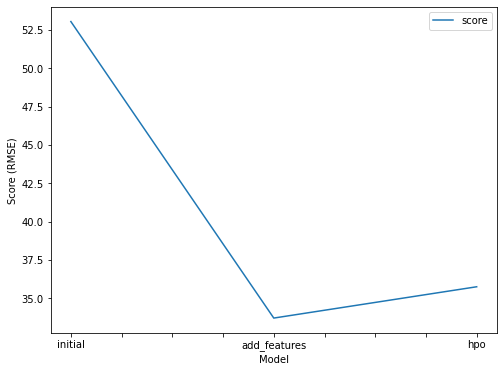

In [147]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-1 * predictor.leaderboard(silent=True)['score_val'][0],
          -1 * predictor_new_features.leaderboard(silent=True)['score_val'][0],
          -1 * predictor_new_hpo.leaderboard(silent=True)['score_val'][0]]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
# Change label name
plt.xlabel("Model")
plt.ylabel("Score (RMSE)")


fig.savefig('model_train_score.png')

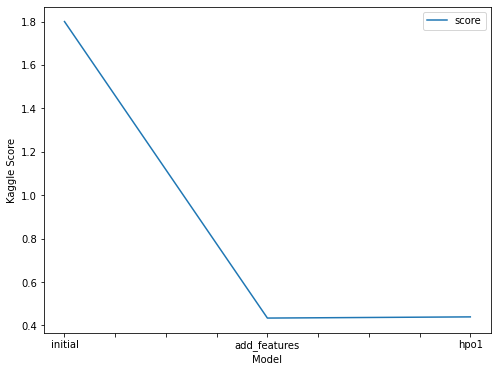

In [148]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo1"],
        "score": [ 1.80031, 0.43413,  0.43957]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
# Change label name
plt.xlabel("Model")
plt.ylabel("Kaggle Score")
fig.savefig('model_test_score.png')

### Hyperparameter table

In [145]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    'Model': ['initial', 'add_features', 'hpo1 - NN_TORCH', 'hpo1 - GBM', 'hpo1 - CAT', 'hpo1 - XGB', 'hpo1 - FASTAI', 'hpo1 - RF', 'hpo1 - XT', 'hpo1 - KNN'],
    'time_limit': [600, 600, 900, 900, 900, 900, 900, 900, 900, 900],
    'Hyperparameters': ['auto', 'auto', 'num_epochs=10, learning_rate=5e-4, dropout_prob=0.3', 'num_boost_round=100, num_leaves=36', 'learning_rate=5e-4, l2_leaf_reg=3, depth=[4, 10], subsample=1.0', 'eta=0.1, max_depth=3, subsample=1.0', 'learning_rate=5e-4, pretrained=[True, False]', 'not specified', 'not specified', 'not specified'],
    'Kaggle Score': [1.8001, 0.43413, 0.43957, 0.43957, 0.43957, 0.43957, 0.43957, 0.43957, 0.43957, 0.43957]
}
)


,Model,time_limit,Hyperparameters,Kaggle Score
0,initial,600,auto,1.80010
1,add_features,600,auto,0.43413
2,hpo1 - NN_TORCH,900,"num_epochs=10, learning_rate=5e-4, dropout_prob=0.3",0.43957
3,hpo1 - GBM,900,"num_boost_round=100, num_leaves=36",0.43957
4,hpo1 - CAT,900,"learning_rate=5e-4, l2_leaf_reg=3, depth=[4, 10], subsample=1.0",0.43957
5,hpo1 - XGB,900,"eta=0.1, max_depth=3, subsample=1.0",0.43957
6,hpo1 - FASTAI,900,"learning_rate=5e-4, pretrained=[True, False]",0.43957
7,hpo1 - RF,900,not specified,0.43957
8,hpo1 - XT,900,not specified,0.43957
9,hpo1 - KNN,900,not specified,0.43957


## **Initial Training**
### What did you realize when you tried to submit your predictions? What changes were needed to the output of the predictor to submit your results?

Kaggle rejected predictions with negative values. To fix this issue, I had to set all negative predictions to zero.

### What was the top ranked model that performed?

WeightedEnsemble_L3 was the best model, followed by WeightedEnsemble_L2 after feature engineering

## **Exploratory data analysis and feature creation**


### What did the exploratory analysis find and how did you add additional features?

After preprocessing the dataset, I ensured that each variable had the correct data type. Additionally, I generated four new features (day, month, year, day_of_week and hour) from the datetime variable. Since these new features represent ordinal data, I assigned them the appropriate data type. I also created a new column called `temp_category` that assigns the categories "Hot", "Mild", or "Cold" based on the temperature values in the `temp` column. Temperatures greater than or equal to 25 are categorized as "Hot", temperatures less than or equal to 10 are categorized as "Cold", and temperatures between 10 and 25 are categorized as "Mild". This allows for easy identification and analysis of temperature ranges in the dataset.

Next, I examined the distribution of the numeric features (`Temp`, `atemp`, `casual`, `registered`, `windspeed`, and `count`). I found that none of the variables followed a normal distribution. Specifically, `temp` exhibited a bimodal distribution, while `atemp` displayed a multimodal distribution. As expected, both registered and casual had extremely right-skewed distributions, similar to the distribution of count. This makes sense since the sum of registered and casual corresponds to the total count of bike rentals.

In addition to assessing the distribution of the numeric features, I analyzed the overall patterns and trends in the categorical features using bar charts. While these visualizations provided some insights, they weren't particularly informative. However, I did observe that bike rentals were higher on workdays compared to non-workdays, and there was an increase in rentals during clear `weather` conditions. To extract more meaningful information from the categorical features, I explored their trends grouped by year. The results indicated that bike rentals increased in 2012 compared to 2011, suggesting a growing acceptance of bikes as a means of transportation. Although bike rentals were higher on workdays in the overall dataset, the analysis based on `year` revealed no significant increase in rentals on workdays versus non-workdays (weekends and holidays) in either year. Regarding `weather` and `season`, it was evident that people tend to use bikes more during warmer periods of the year. Analyzing the trends by `hour` revealed that bike usage peaked between 7 AM and 8 PM, with the highest demand occurring around 8 AM and from 4 PM to 7 PM throughout the year.

Furthermore, I discovered a strong positive correlation of approximately 0.98 between `temp` and `atemp`, suggesting a high degree of association (multicollinearity) between these two features. Consequently, it may be appropriate to drop one of them, and in this case, I recommend dropping atemp. Additionally, count exhibited highly positive correlations of approximately 0.97 and 0.68 with `registered` and `casual`, respectively. This correlation is expected since the sum of `registered` and `casual` yields the total count of bike rentals.

Lastly, I noted a moderate positive correlation of approximately 0.39 between `temp` and `count`, indicating that higher temperatures tend to be associated with higher bike rental counts. As the variables casual and registered are not included in the test dataset, it is advisable to drop them from the analysis.


### How much better did your model preform after adding additional features and why do you think that is?

The model's performance significantly improved after adding the additional features. The reduction in RMSE from 53.039754 to about 33.707630 and the decrease in the Kaggle score from approximately 1.8001 to 0.43413 indicate a substantial improvement in the model's predictive accuracy. The new features, such as day, month, year, and hour, and temp_category provided the model with more detailed information about the dataset. Also, removing one of the highly correlated features and using the correct data type helped reduced redundancy, allowing the model to focus on the most relevant and independent information, and to better capture the underlying patterns in within the dataset.


## **Hyper parameter tuning**

### How much better did your model preform after trying different hyper parameters?
I was unable to improve the performance of the model after trying different hyper parameters. Rather I obtained models slightly lower in performance (0.44028 and 0.44038 as Kaggle Score) to the previous model.


### If you were given more time with this dataset, where do you think you would spend more time?

Given additional time, I would prioritize enhancing the hyperparameter tuning process by exploring different combinations of hyperparameters to find the ones that yield the best results for improved model performance.

### Create a table with the models you ran, the hyperparameters modified, and the kaggle score.

|     Model     |     Hyperparameters  used for tuning                            |
|:-------------:|:---------------------------------------------------------------:|
|   NN_TORCH    | num_epochs=10, learning_rate=5e-4, dropout_prob=0.3             |
|      GBM      | num_boost_round=100, num_leaves=36                              |
|      CAT      | learning_rate=5e-4, l2_leaf_reg=3, depth=[4, 10], subsample=1.0 |
|      XGB      | eta=0.1, max_depth=3, subsample=1.0                             |
|    FASTAI     | learning_rate=5e-4, pretrained=[True, False]                    |
|      RF       | N/A                                                             |
|      XT       | N/A                                                             |
|      KNN      | N/A                                                             |

|     Model      | time_limit |                      Hyperparameters                             |  score |
|:--------------:|:----------:|:----------------------------------------------------------------:|:------:|
|   initial      |    600     |                             auto                                 | 1.8001 |
| add_features   |    600     |                             auto                                 | 0.43413|
| hpo1 - NN_TORCH|    900     |  num_epochs=10, learning_rate=5e-4, dropout_prob=0.3             | 0.43957|
| hpo1 - GBM     |    900     |  num_boost_round=100, num_leaves=36                              | 0.43957|
| hpo1 - CAT     |    900     |  learning_rate=5e-4, l2_leaf_reg=3, depth=[4, 10], subsample=1.0 | 0.43957|
| hpo1 - XGB     |    900     |  eta=0.1, max_depth=3, subsample=1.0                             | 0.43957|
| hpo1 - FASTAI  |    900     |  learning_rate=5e-4, pretrained=[True, False]                    | 0.43957|
| hpo1 - RF      |    900     |                             not specified                        | 0.43957|
| hpo1 - XT      |    900     |                             not specified                        | 0.43957|
| hpo1 - KNN     |    900     |                             not specified                        | 0.43957|

